# Counting Circles and Ellipses + Finding Image Piece with Template Matching

- Counting circular blobs
- using template matching to find a piece in an image

---
### Imports and Helper-functions

In [216]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [217]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [227]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = "../../res/img/course_img/blobs.jpg"
IMG_PATH   

'../../res/img/course_img/blobs.jpg'

---
### Loading data

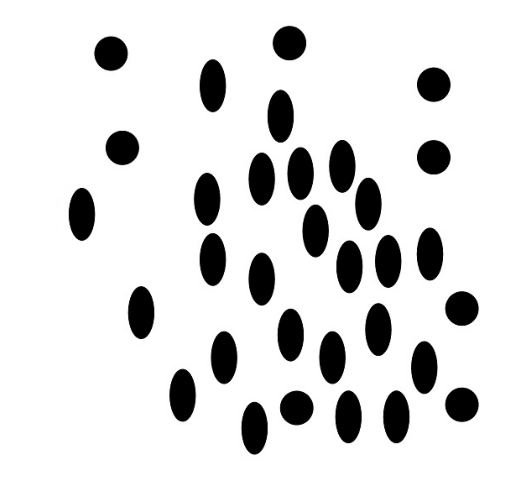

In [230]:
img = cv2.imread(IMG_PATH)
imshow(img, size=7)

---
### Filter Circular Blobs

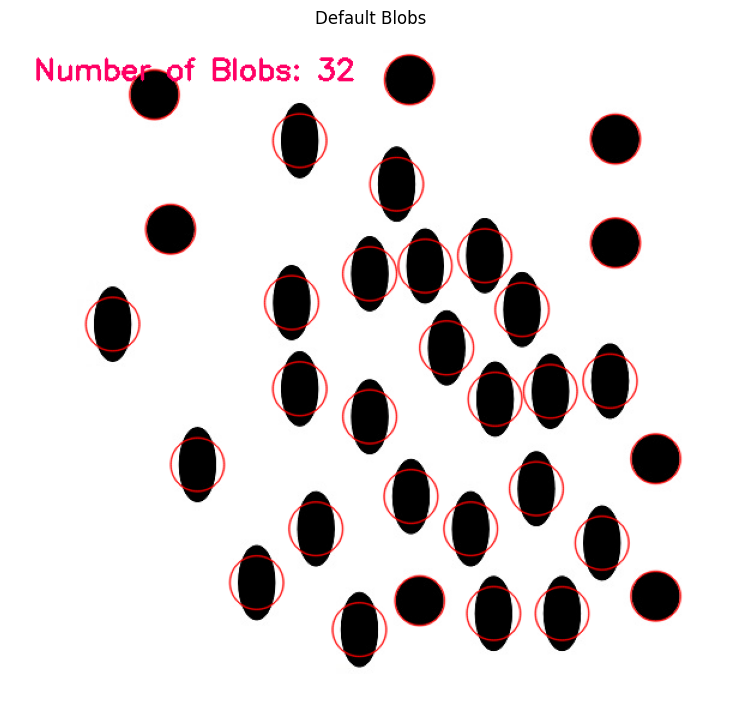

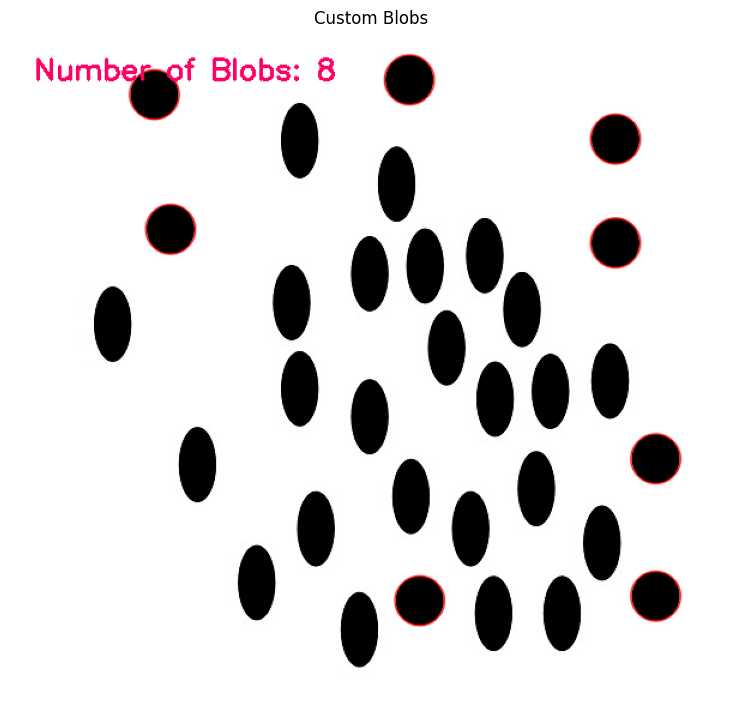

In [231]:
copy_img = img.copy()

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(img)

blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(copy_img, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

n_blobs = len(keypoints)
cv2.putText(blobs, f"Number of Blobs: {n_blobs}", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (100, 0, 255), 2)

imshow(blobs, "Default Blobs")

# Change params of blob detection (interesting area)
copy_img = img.copy()
params = cv2.SimpleBlobDetector_Params()

# filter
params.filterByArea = True
params.minArea = 10

# circularity filter
params.filterByCircularity = True
params.minCircularity = 0.8

# convexity filter
params.filterByConvexity = True
params.minConvexity = 0.01

# inertia filter
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(img)
blobs = cv2.drawKeypoints(copy_img, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

n_blobs = len(keypoints)
cv2.putText(blobs, f"Number of Blobs: {n_blobs}", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (100, 0, 255), 2)

imshow(blobs, "Custom Blobs")

---
### Find a piece of an image

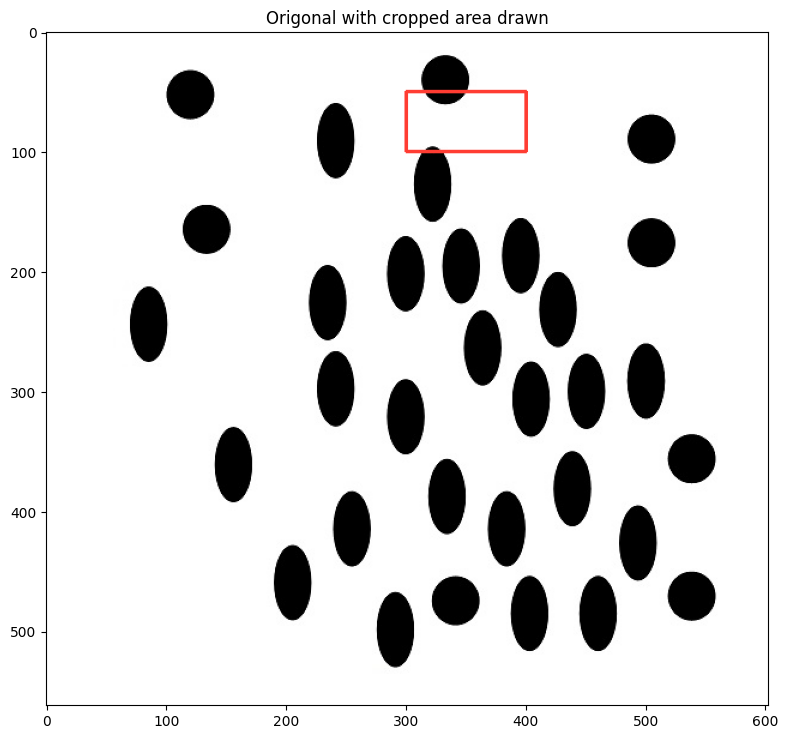

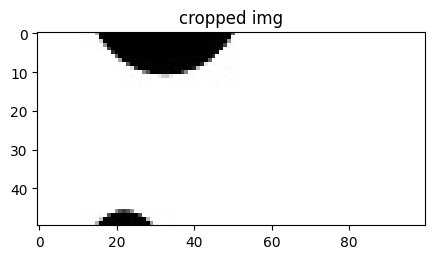

In [233]:
height, width = img.shape[:2]

start_x = 300
start_y = 50
end_x = 400
end_y = 100

cropped_img = img[start_y:end_y, start_x:end_x]

# show the cropping
copy_img = img.copy()
cv2.rectangle(copy_img, (start_x, start_y), (end_x, end_y), (50, 60, 255), 2)

imshow(copy_img, "Origonal with cropped area drawn", axis=True)
imshow(cropped_img, "cropped img", axis=True)

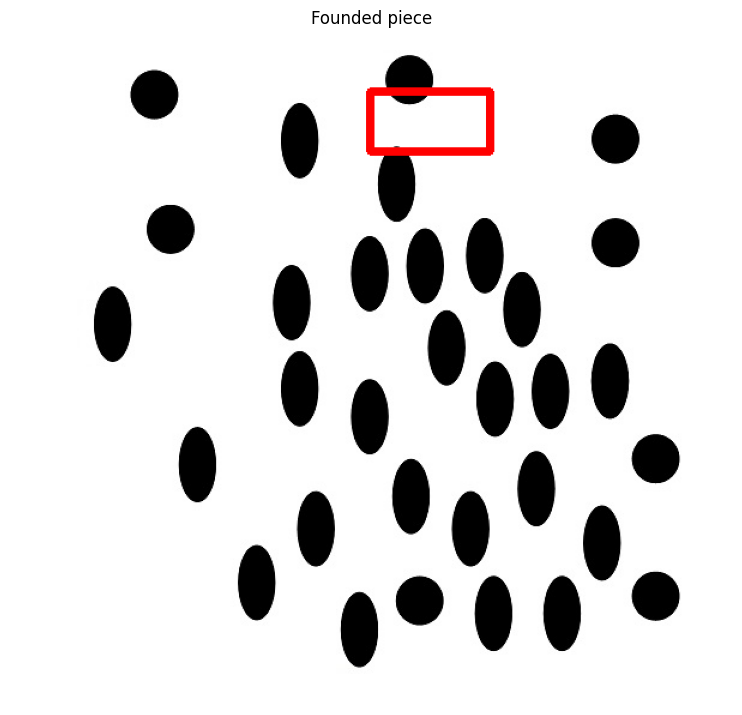

In [234]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(gray, gray_template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0]+gray_template.shape[1], top_left[1]+gray_template.shape[0])
copy_img = img.copy()
cv2.rectangle(copy_img, top_left, bottom_right, (0, 0, 255), 5)

imshow(copy_img, "Founded piece")

---